In [16]:
# Decision Tree Model with sample Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= {
    "Age": [25,26,35,45, 67, 80, 12, 60],
    "BloodPressure": [120, 140, 150, 130, 110, 160, 170, 145],
    "Diabetes": [85,90,200,180,70,160,220,195],
    "Diagnosis": ["Normal", "Pre-hypertension", "Diabetic", "Hypertension", "Normal", "Diabetic", "Hypertension", "Diabetic"]
}

In [3]:
df= pd.DataFrame(data)
print(df)

   Age  BloodPressure  Diabetes         Diagnosis
0   25            120        85            Normal
1   26            140        90  Pre-hypertension
2   35            150       200          Diabetic
3   45            130       180      Hypertension
4   67            110        70            Normal
5   80            160       160          Diabetic
6   12            170       220      Hypertension
7   60            145       195          Diabetic


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [6]:
X = df[["Age", "BloodPressure", "Diabetes"]]
y= df["Diagnosis"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [9]:
clf = DecisionTreeClassifier(criterion= "entropy", max_depth= 3, random_state= 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
print("Predictions" , y_pred)
print("Actual", list(y_test))

Predictions ['Hypertension' 'Hypertension']
Actual ['Pre-hypertension', 'Diabetic']


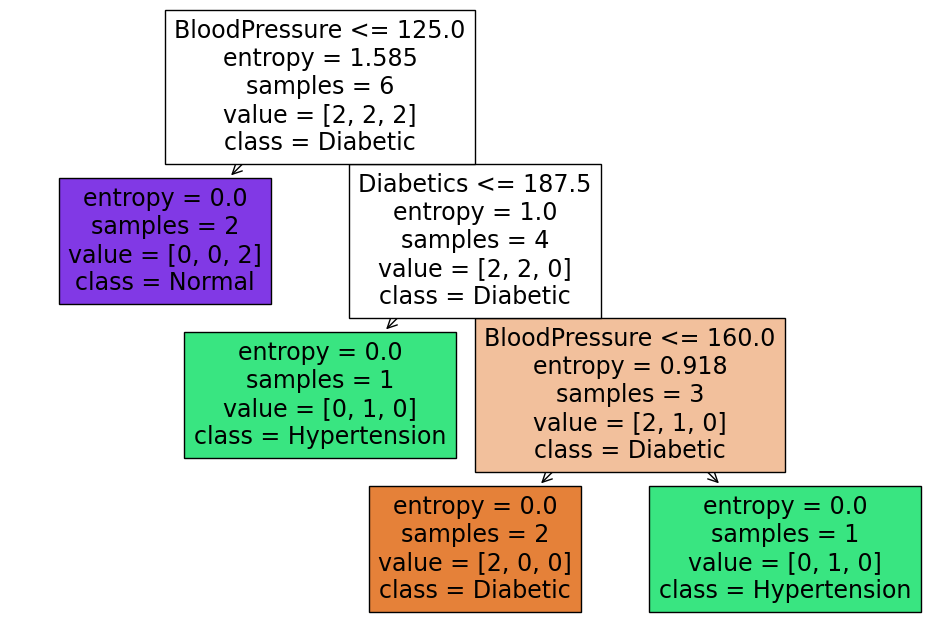

In [12]:
plt.figure(figsize= (12,8))
plot_tree(clf, feature_names= ["Age", "BloodPressure", "Diabetics"], class_names=clf.classes_, filled= True)
plt.show()

In [14]:
# Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

In [18]:
data= {
    "Age": [25,26,35,45, 67, 80, 12, 60],
    "BloodPressure": [120, 140, 150, 130, 110, 160, 170, 145],
    "Diabetes": [85,90,200,180,70,160,220,195],
    "Diagnosis": ["Normal", "Pre-hypertension", "Diabetic", "Hypertension", "Normal", "Diabetic", "Hypertension", "Diabetic"]
}

In [19]:
df = pd.DataFrame(data)
print(df)

   Age  BloodPressure  Diabetes         Diagnosis
0   25            120        85            Normal
1   26            140        90  Pre-hypertension
2   35            150       200          Diabetic
3   45            130       180      Hypertension
4   67            110        70            Normal
5   80            160       160          Diabetic
6   12            170       220      Hypertension
7   60            145       195          Diabetic


In [20]:
X = df[["Age", "BloodPressure", "Diabetes"]]
y = df["Diagnosis"]

In [21]:
le= LabelEncoder()
y= le.fit_transform(y)

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [23]:
rf = RandomForestClassifier(
    n_estimators= 100,
    criterion= "entropy",
    max_depth= 5,
    random_state= 42,
    n_jobs= -1,
    oob_score= True
)

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_jobs=-1,
                       oob_score=True, random_state=42)

In [29]:
y_pred= rf.predict(X_test)
y_prob= rf.predict_proba(X_test)

In [30]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6666666666666666


In [31]:
print("Confusion Matrix", confusion_matrix(y_test, y_pred))
print("OOB score (approx CV): ", rf.oob_score)

Confusion Matrix [[1 0 0]
 [0 1 0]
 [1 0 0]]
OOB score (approx CV):  True


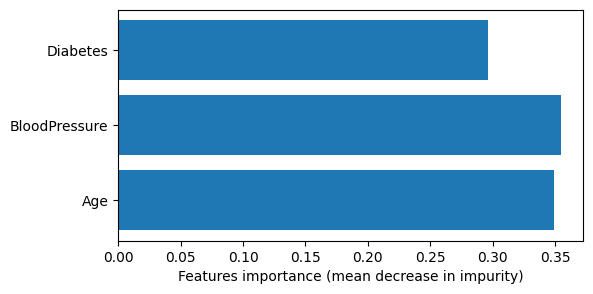

In [32]:
importances= rf.feature_importances_
features= X.columns
plt.figure(figsize= (6,3))
plt.barh(features, importances)
plt.xlabel("Features importance (mean decrease in impurity)")
plt.show()

In [34]:
cv_scores= cross_val_score(rf, X, y, cv= 3, scoring= "accuracy", n_jobs= -1) ## runs 3-fold CV on the entrire dataset to estimate genralization performance.
print("cross-validation_score: ", np.round(cv_scores.mean(), 3))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


cross-validation_score:  0.389


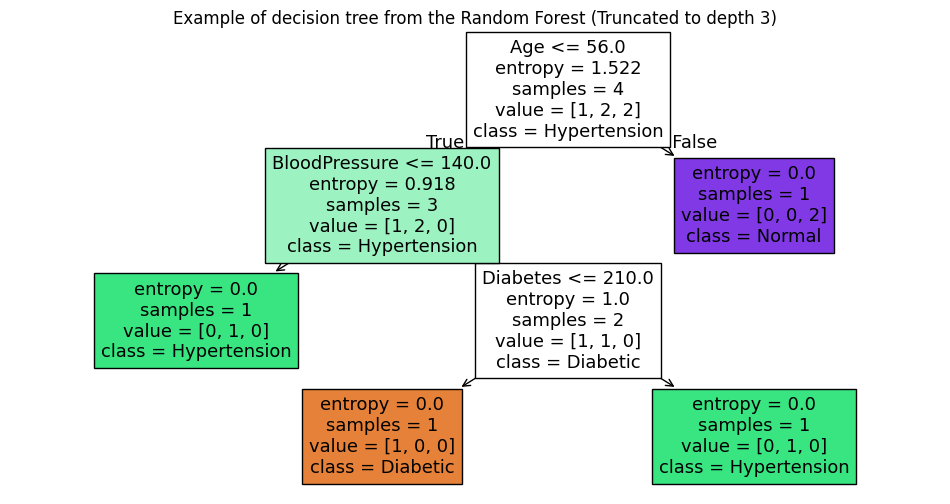

In [35]:
plt.figure(figsize=(12,6))
plot_tree(rf.estimators_[0], feature_names= features, class_names= le.classes_, filled= True, max_depth= 3)
plt.title("Example of decision tree from the Random Forest (Truncated to depth 3)")
plt.show()